# StrideStats: Monthly Activities Overview

This notebook provides a monthly breakdown of your Strava activities by type, perfect for visualizing long-term trends across thousands of activities.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plots to look nice
sns.set_theme(style="whitegrid")
%matplotlib inline

## 1. Load Data
We load the flattened data and prepare the monthly time-based columns.

In [5]:
data_path = Path("../data/processed/activities.parquet")
if not data_path.exists():
    print("Error: activities.parquet not found.")
else:
    df = pd.read_parquet(data_path)
    df['start_date'] = pd.to_datetime(df['start_date'])
    
    # Create a 'Month' column (using start of month)
    df['month_start'] = df['start_date'].dt.to_period('M').dt.start_time
    
    print(f"Loaded {len(df)} activities.")
    display(df.head())

Loaded 2386 activities.


/var/folders/kd/tqlqx8jd3j97g2k55tq24c4h0000gn/T/ipykernel_49928/820648562.py:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month_start'] = df['start_date'].dt.to_period('M').dt.start_time


,id,name,type,sport_type,start_date,start_date_local,distance,moving_time,elapsed_time,total_elevation_gain,average_speed,max_speed,year,month_start
0,8087382360,Morning Rainy Run 🌧️,Run,Run,2022-11-08 14:37:42+00:00,2022-11-08T06:37:42Z,7647.3,2591,2852,40.3,2.952,4.386,2022,2022-11-01
1,5900118653,Runsploring SEA,Run,Run,2021-09-03 15:23:49+00:00,2021-09-03T08:23:49Z,30064.0,11957,13528,119.5,2.514,4.500,2021,2021-09-01
2,16596761445,Tawhai Falls (Gollum's Pool),Walk,Walk,2025-11-29 05:22:26+00:00,2025-11-29T18:22:26Z,892.3,875,1513,24.7,1.020,2.300,2025,2025-11-01
3,6476977675,Morning Run 🪵,Run,Run,2022-01-05 15:12:24+00:00,2022-01-05T07:12:24Z,7625.6,2970,3135,39.9,2.568,3.192,2022,2022-01-01
4,5044084302,Morning Essential Activity 🏃,Run,Run,2021-03-31 14:13:03+00:00,2021-03-31T07:13:03Z,7787.5,2898,3356,41.3,2.687,4.600,2021,2021-03-01


## 2. Monthly Activity Breakdown
This chart shows the number of activities per month, colored by activity type.

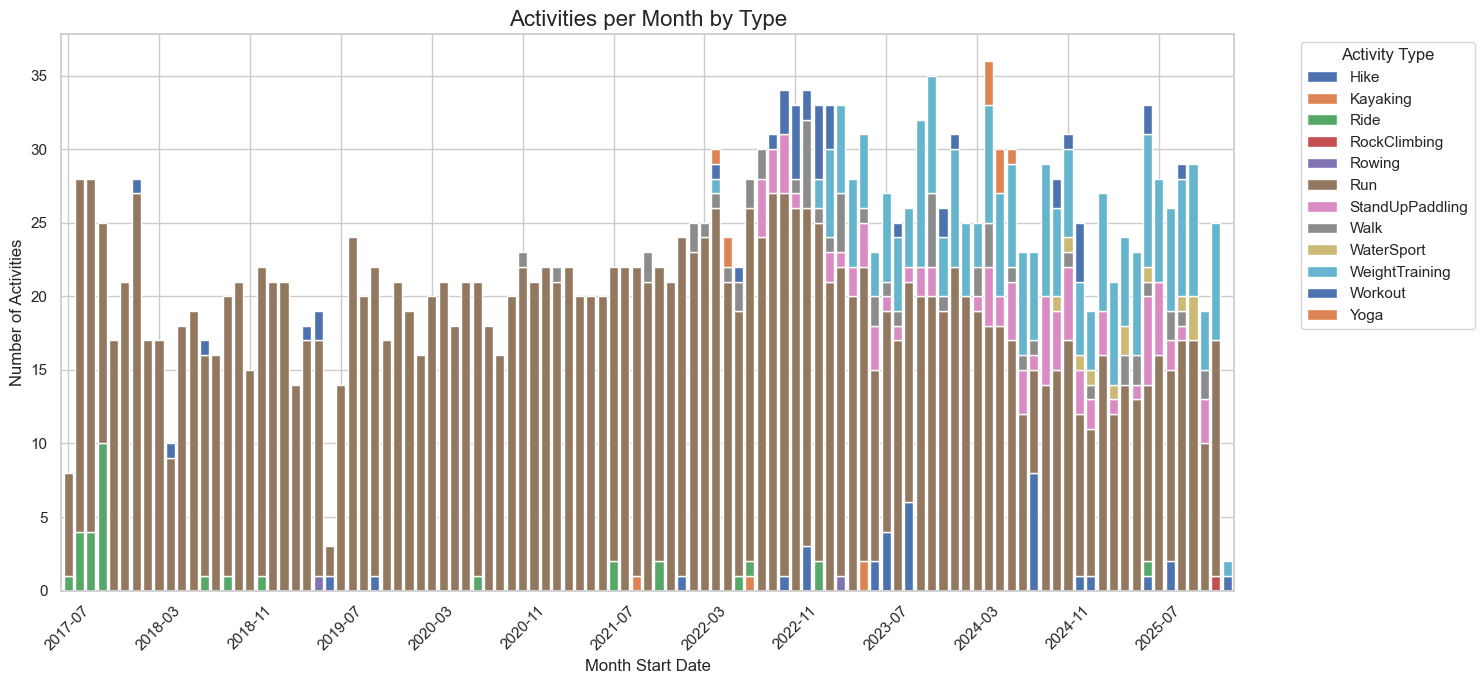

In [6]:
if 'df' in locals():
    # Group by month and type
    monthly_summary = df.groupby(['month_start', 'type']).size().unstack(fill_value=0)
    
    # Plot
    plt.figure(figsize=(15, 7))
    monthly_summary.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
    
    plt.title("Activities per Month by Type", fontsize=16)
    plt.xlabel("Month Start Date", fontsize=12)
    plt.ylabel("Number of Activities", fontsize=12)
    
    # Format X-axis to show dates nicely (YYYY-MM)
    labels = [d.strftime('%Y-%m') for d in monthly_summary.index]
    # Adjust spacing if there are many years
    n = max(1, len(labels) // 12)  # Show ~1 label per year roughly
    plt.xticks(ticks=range(0, len(labels), n), labels=labels[::n], rotation=45)
    
    plt.legend(title="Activity Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Dataframe 'df' not loaded.")

## 3. Monthly Distance Breakdown
This chart shows the total distance covered per month (in kilometers), categorized by activity type.

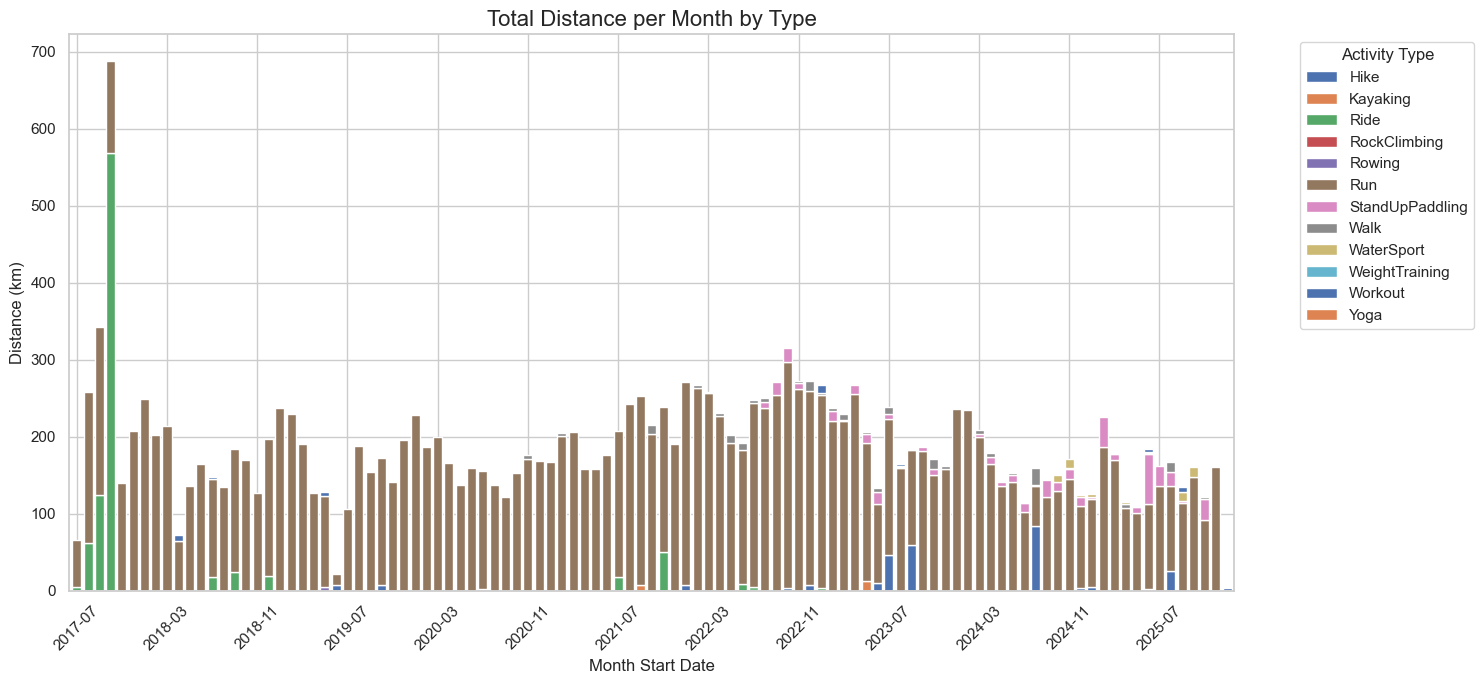

In [7]:
if 'df' in locals():
    # Convert distance to kilometers (Strava stores it in meters)
    df['distance_km'] = df['distance'] / 1000.0
    
    # Group by month and type, summing the distance
    monthly_distance = df.groupby(['month_start', 'type'])['distance_km'].sum().unstack(fill_value=0)
    
    # Plot
    plt.figure(figsize=(15, 7))
    monthly_distance.plot(kind='bar', stacked=True, ax=plt.gca(), width=0.8)
    
    plt.title("Total Distance per Month by Type", fontsize=16)
    plt.xlabel("Month Start Date", fontsize=12)
    plt.ylabel("Distance (km)", fontsize=12)
    
    # Format X-axis
    labels = [d.strftime('%Y-%m') for d in monthly_distance.index]
    n = max(1, len(labels) // 12)
    plt.xticks(ticks=range(0, len(labels), n), labels=labels[::n], rotation=45)
    
    plt.legend(title="Activity Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Dataframe 'df' not loaded.")